In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
#import planckStyle
import pylab
import numpy as np


In [6]:
dir_name = '/home/isidro/SuperMC/chains/owaChains'

roots = ['nled_SN+RiessH0+BBAO_bambi_0.1_', 'LCDM_SN+RiessH0+BBAO_bambi_0.1']
nledroot = ['owaCDM_BBAO+SN+RiessH0_mnest_0.5.txt']

In [7]:
with open(dir_name+'nled_py_SN+RiessH0+BBAO_mh_10000.paramnames','+a') as file:
    data = file.read()
    #file.writelines('Ol			\Omega_\Lambda\n')
    file.writelines('b			b\n')
    file.writelines('beta			\Beta')


In [8]:
import pandas as pd

In [6]:
data = pd.read_csv(dir_name+'nled_py_SN+RiessH0+BBAO_mh_10000_1.txt', sep=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.290880e-151,693.900,0.394936,0.021929,0.604418,0.004973,0.999958,0.699302,-176.756,-15.4897,-320.669,-135.502,-15.045,-23.9185,-2,-4.5,-0.019659,NaN
1,8.645640e-151,691.067,0.398031,0.022014,0.604853,0.004977,0.999949,0.698639,-176.445,-15.3891,-318.266,-135.502,-15.045,-23.9185,-2,-4.5,-0.000098,NaN
2,1.734880e-149,689.227,0.399578,0.021875,0.601035,0.004967,0.999910,0.697424,-176.336,-16.2842,-315.592,-135.502,-15.045,-23.9185,-2,-4.5,-0.049324,NaN
3,2.844910e-150,692.268,0.397910,0.022107,0.609611,0.004970,0.999934,0.697993,-176.540,-14.3088,-320.435,-135.502,-15.045,-23.9185,-2,-4.5,-0.018002,NaN
4,1.891250e-150,689.501,0.397701,0.022133,0.600010,0.004970,0.999940,0.699310,-176.401,-16.5289,-315.575,-135.502,-15.045,-23.9185,-2,-4.5,-0.030296,NaN


In [23]:
#2-Om, 3-Obh2,4- h, 5-b0, 6-hh0, 7-Olambda,8- b, 9-beta
#6*h0/b0*(1-om-ol-b0/(6*h0))*(b0+0.25)
data[17]=(6*data[6]/data[5])*(1-data[2]-data[7]-(data[5]/(6*data[6])))*(data[5]+0.25)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.290880e-151,693.900,0.394936,0.021929,0.604418,0.004973,0.999958,0.699302,-176.756,-15.4897,-320.669,-135.502,-15.045,-23.9185,-2,-4.5,-0.019659,-29.242764,-29.242764,0.000165
1,8.645640e-151,691.067,0.398031,0.022014,0.604853,0.004977,0.999949,0.698639,-176.445,-15.3891,-318.266,-135.502,-15.045,-23.9185,-2,-4.5,-0.000098,-29.968561,-29.968561,0.000165
2,1.734880e-149,689.227,0.399578,0.021875,0.601035,0.004967,0.999910,0.697424,-176.336,-16.2842,-315.592,-135.502,-15.045,-23.9185,-2,-4.5,-0.049324,-30.128053,-30.128053,0.000166
3,2.844910e-150,692.268,0.397910,0.022107,0.609611,0.004970,0.999934,0.697993,-176.540,-14.3088,-320.435,-135.502,-15.045,-23.9185,-2,-4.5,-0.018002,-29.771843,-29.771843,0.000164
4,1.891250e-150,689.501,0.397701,0.022133,0.600010,0.004970,0.999940,0.699310,-176.401,-16.5289,-315.575,-135.502,-15.045,-23.9185,-2,-4.5,-0.030296,-30.111391,-30.111391,0.000167


In [24]:
data[18]=data[6]/(data[4]*10000)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.290880e-151,693.900,0.394936,0.021929,0.604418,0.004973,0.999958,0.699302,-176.756,-15.4897,-320.669,-135.502,-15.045,-23.9185,-2,-4.5,-0.019659,-29.242764,0.000165,0.000165
1,8.645640e-151,691.067,0.398031,0.022014,0.604853,0.004977,0.999949,0.698639,-176.445,-15.3891,-318.266,-135.502,-15.045,-23.9185,-2,-4.5,-0.000098,-29.968561,0.000165,0.000165
2,1.734880e-149,689.227,0.399578,0.021875,0.601035,0.004967,0.999910,0.697424,-176.336,-16.2842,-315.592,-135.502,-15.045,-23.9185,-2,-4.5,-0.049324,-30.128053,0.000166,0.000166
3,2.844910e-150,692.268,0.397910,0.022107,0.609611,0.004970,0.999934,0.697993,-176.540,-14.3088,-320.435,-135.502,-15.045,-23.9185,-2,-4.5,-0.018002,-29.771843,0.000164,0.000164
4,1.891250e-150,689.501,0.397701,0.022133,0.600010,0.004970,0.999940,0.699310,-176.401,-16.5289,-315.575,-135.502,-15.045,-23.9185,-2,-4.5,-0.030296,-30.111391,0.000167,0.000167


In [25]:
np.savetxt(dir_name+'nled_py_SN+RiessH0+BBAO_mh_10000.txt', data.values[0:18])

In [12]:
root = ['owaCDM_BBAO+SN+RiessH0_mnest_0.5.txt']
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch=20, ratio=0.6,
                          analysis_settings={'smooth_scale_2D': 0.6, 'ignore_rows': 0.2})

<Figure size 1440x864 with 0 Axes>

In [14]:
g.settings.axes_fontsize = 8
g.settings.lab_fontsize = 12
g.settings.alpha_filled_add =0.5
g.settings.auto_ticks
#g.plot_2d(root,'Om','Obh2', filled=False, nx=1, alphas=[0.9], colors=['blue','red'])
g.plot_2d(nledroot,'Om','Obh2', filled=True, nx=1, alphas=[0.9],colors=['red'])
#g.add_text('$k_{eq}=0.0152$', x=0.27, y=0.15, fontsize =13)
#g.add_legend(['mh', 'snest','mnest','sbambi','bambi'], 
#             colored_text=True,  legend_loc='upper right')
#plt.savefig('a.png')


GetDistPlotError: chain not found: owaCDM_BBAO+SN+RiessH0_mnest_0.5.txt

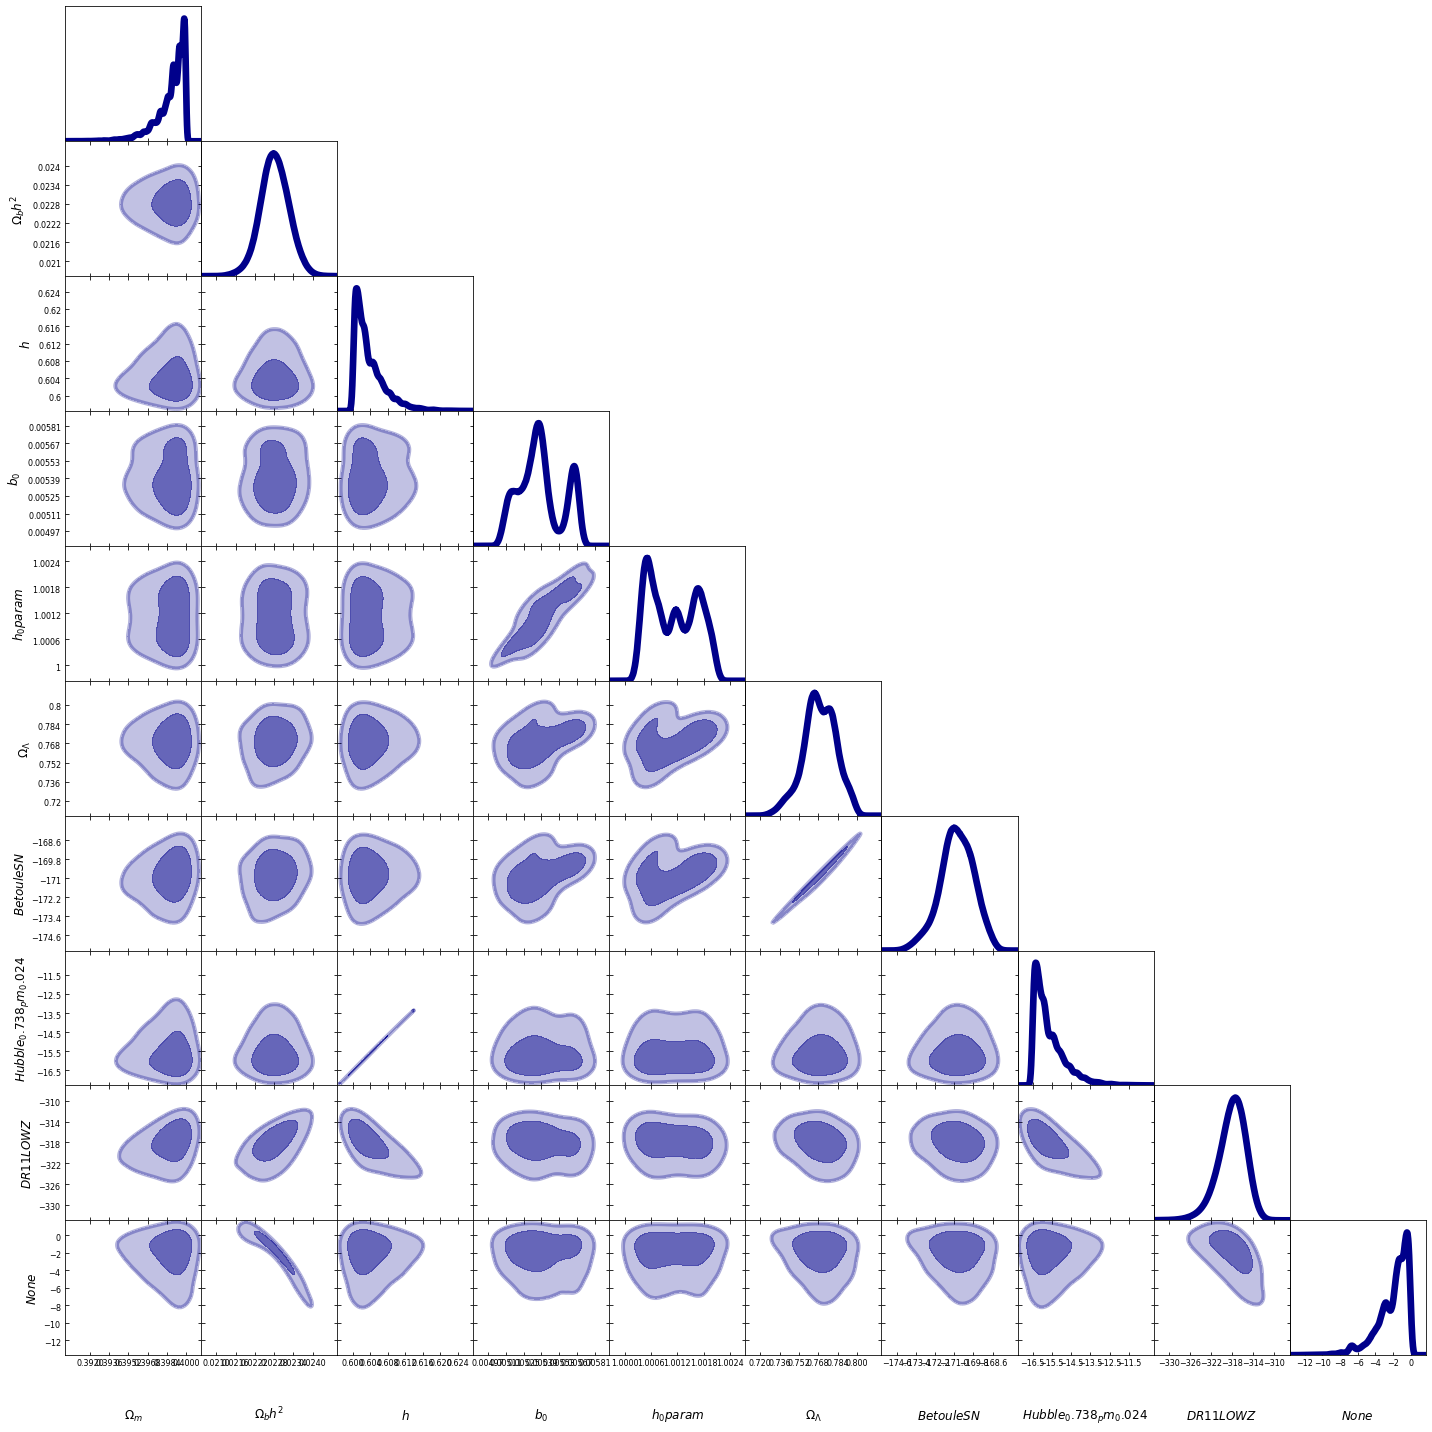

In [19]:
g.settings.axes_fontsize = 8
g.settings.lab_fontsize = 12
g.settings.alpha_filled_add =0.5
g.settings.figure_legend_frame = False
g.settings.auto_ticks

g.triangle_plot(root,
                colors=['darkblue'], filled=True, line_args={'color':'darkblue'},
                nx=1, alphas=[0.6],  title_limit=0.5)

plt.savefig('nledtriangleFULLMetropolisHastings10000.png')

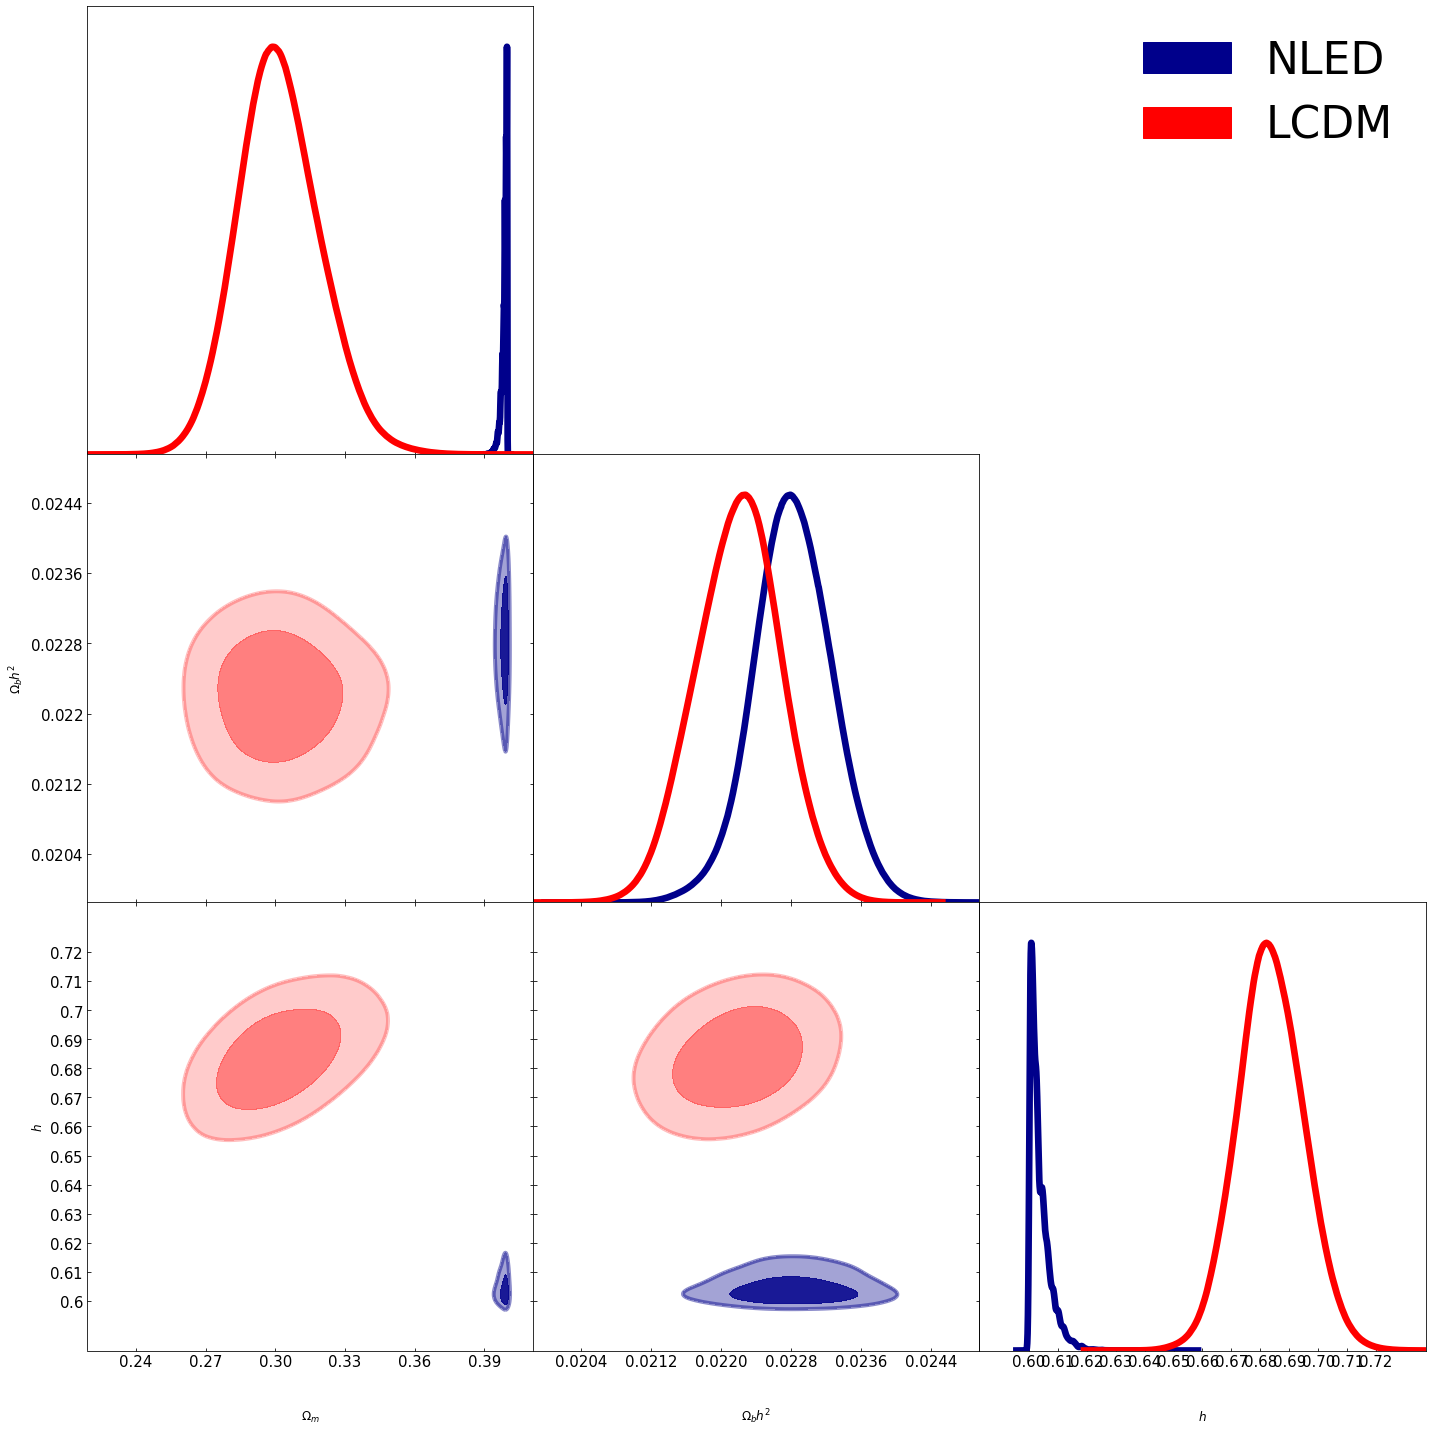

In [36]:
roots = ['nled_py_SN+RiessH0+BBAO_mh_10000_1','LCDM_py_SN+RiessH0+BBAO_mh_10000_1']

g.settings.axes_fontsize =15
g.settings.lab_fontsize = 12
g.settings.alpha_filled_add =0.5
g.settings.figure_legend_frame = False
g.settings.auto_ticks
g.triangle_plot(roots, ['Om', 'Obh2', 'h'], 
                filled=True, nx=1, alphas=[0.9], colors=['darkblue','red'],
                line_args=[{'color':'darkblue'}, {'color':'red'}],
                legend_labels=['NLED', 'LCDM'], 
                normalized=True)

plt.savefig('nledvsLCDMMetropolisHastings.png')
